In [43]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [44]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHES=50

In [45]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "training",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 3000 files belonging to 3 classes.


In [46]:
class_names = dataset.class_names
class_names

['Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___healthy']

(32, 256, 256, 3)
[0 1 2 0 2 2 0 0 0 2 1 1 0 0 1 0 0 0 2 2 0 0 1 2 0 2 2 2 1 2 0 2]


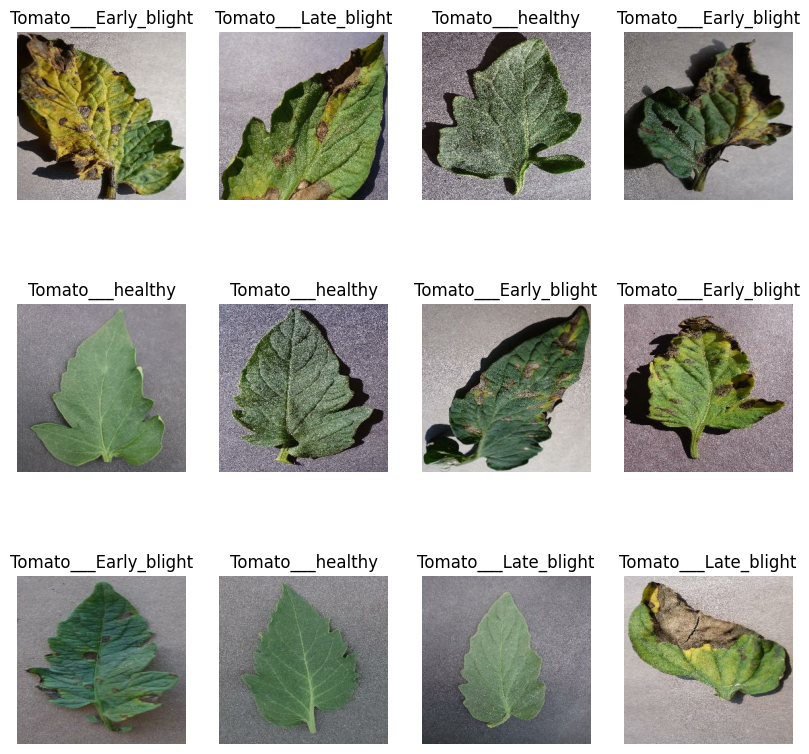

In [47]:
plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [48]:
80% ==> Training 
10% ==> Validation
10% ==> Test

SyntaxError: invalid syntax (1133083727.py, line 1)

In [49]:
train_size =  0.8 
len(dataset)*train_size

75.2

In [50]:
train_ds = dataset.take(75)
len(train_ds)

75

In [51]:
test_ds = dataset.skip(75)
len(test_ds)

19

In [52]:
val_size = 0.1
len(dataset)*val_size

9.4

In [53]:
val_ds = test_ds.take(9)
len(val_ds)

9

In [54]:
test_ds = test_ds.skip(6)
len(test_ds)

13

In [55]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert(train_split+test_split+val_split) ==1
    ds_size = len(ds)

    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [56]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [57]:
len(train_ds)

75

In [58]:
len(val_ds)

9

In [59]:
len(test_ds)

10

In [60]:
75*32


2400

In [61]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [62]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)

[[[0.6901961  0.6784314  0.72156864]
  [0.6156863  0.6039216  0.64705884]
  [0.59607846 0.58431375 0.627451  ]
  ...
  [0.7294118  0.72156864 0.7647059 ]
  [0.72156864 0.7137255  0.75686276]
  [0.5882353  0.5803922  0.62352943]]

 [[0.62352943 0.6117647  0.654902  ]
  [0.61960787 0.60784316 0.6509804 ]
  [0.57254905 0.56078434 0.6039216 ]
  ...
  [0.6784314  0.67058825 0.7137255 ]
  [0.6901961  0.68235296 0.7254902 ]
  [0.7176471  0.70980394 0.7529412 ]]

 [[0.6745098  0.6627451  0.7058824 ]
  [0.4392157  0.42745098 0.47058824]
  [0.49411765 0.48235294 0.5254902 ]
  ...
  [0.7921569  0.78431374 0.827451  ]
  [0.6784314  0.67058825 0.7137255 ]
  [0.7372549  0.7294118  0.77254903]]

 ...

 [[0.32941177 0.2901961  0.33333334]
  [0.4392157  0.4        0.44313726]
  [0.5294118  0.49019608 0.53333336]
  ...
  [0.36078432 0.32941177 0.37254903]
  [0.4745098  0.44313726 0.4862745 ]
  [0.5686275  0.5372549  0.5803922 ]]

 [[0.65882355 0.61960787 0.6627451 ]
  [0.3882353  0.34901962 0.39215687]


In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling
from tensorflow.keras.layers import Resizing


resize_and_rescale = Sequential([
    Rescaling(1.0/255),
    Resizing(IMAGE_SIZE, IMAGE_SIZE)
])


In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import RandomFlip
from tensorflow.keras.layers import RandomRotation


data_augmentation = Sequential([
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2),
])


In [65]:
input_shape = (32, IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes =3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3,3), activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation = 'softmax'),
])
model.build(input_shape=input_shape)

In [66]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_11 (Sequential)      │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_12 (Sequential)      │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_54 (MaxPooling2D) │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_55 (MaxPooling2D) │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_56 (MaxPooling2D) │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_57 (MaxPooling2D) │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_58 (MaxPooling2D) │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_59 (MaxPooling2D) │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [68]:
history = model.fit( 
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHES

)
    

Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step - accuracy: 0.3955 - loss: 1.0773 - val_accuracy: 0.6736 - val_loss: 0.7125
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.7337 - loss: 0.6755 - val_accuracy: 0.8021 - val_loss: 0.5598
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.8022 - loss: 0.4598 - val_accuracy: 0.8715 - val_loss: 0.3231
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.8328 - loss: 0.3856 - val_accuracy: 0.8507 - val_loss: 0.3319
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.8166 - loss: 0.4324 - val_accuracy: 0.7465 - val_loss: 0.6797
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.8294 - loss: 0.3825 - val_accuracy: 0.8958 - val_loss: 0.2778
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.8439 - loss: 0.3579 - val_accuracy: 0.8715 - val_loss: 0.2718
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.8645 - loss: 0.3194 - val_accuracy: 0.8819 - val_los

In [71]:
len(test_ds)

10

In [70]:
scores = model.evaluate(test_ds)

10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 309ms/step - accuracy: 0.9237 - loss: 0.1761


In [72]:
scores

[0.15454551577568054, 0.934374988079071]

In [73]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 75}

In [74]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [75]:
history.history['loss']

[1.0093514919281006,
 0.6579280495643616,
 0.43335774540901184,
 0.4020704925060272,
 0.40679803490638733,
 0.3703027665615082,
 0.3548338711261749,
 0.3474537134170532,
 0.32793810963630676,
 0.3359430432319641,
 0.28233015537261963,
 0.24455977976322174,
 0.24887926876544952,
 0.22990676760673523,
 0.24817100167274475,
 0.2497919499874115,
 0.19010287523269653,
 0.1682852804660797,
 0.19095824658870697,
 0.23237213492393494,
 0.19496412575244904,
 0.15633171796798706,
 0.19095665216445923,
 0.18771220743656158,
 0.14928855001926422,
 0.1292155683040619,
 0.14207150042057037,
 0.14735965430736542,
 0.1362786591053009,
 0.121333047747612,
 0.12321045249700546,
 0.10159685462713242,
 0.25827446579933167,
 0.11588793247938156,
 0.12557141482830048,
 0.11809327453374863,
 0.11894913017749786,
 0.09752969443798065,
 0.11105222254991531,
 0.09728458523750305,
 0.0961557924747467,
 0.09924791753292084,
 0.09178029745817184,
 0.08939428627490997,
 0.08504455536603928,
 0.08852332830429077,
 0

In [76]:
history.history['accuracy']

[0.47533443570137024,
 0.7437291145324707,
 0.8114548325538635,
 0.8227424621582031,
 0.83152174949646,
 0.8344481587409973,
 0.8436455130577087,
 0.8520066738128662,
 0.8599498271942139,
 0.8666387796401978,
 0.8821070194244385,
 0.8979933261871338,
 0.9038461446762085,
 0.910953164100647,
 0.9055184125900269,
 0.9005016684532166,
 0.9264214038848877,
 0.9364548325538635,
 0.9180601835250854,
 0.9193143844604492,
 0.9301839470863342,
 0.9410535097122192,
 0.9255852699279785,
 0.9322742223739624,
 0.9443979859352112,
 0.9481605291366577,
 0.9464883208274841,
 0.9473243951797485,
 0.9485785961151123,
 0.9527592062950134,
 0.9535953402519226,
 0.9632107019424438,
 0.9117892980575562,
 0.9581939578056335,
 0.9519230723381042,
 0.9590300917625427,
 0.9636287689208984,
 0.964046835899353,
 0.9586120247840881,
 0.9632107019424438,
 0.9611204266548157,
 0.9627926349639893,
 0.9715719223022461,
 0.9657190442085266,
 0.967391312122345,
 0.9707357883453369,
 0.9719899892807007,
 0.96822744607925

In [77]:
history.history['loss'][:5] # show loss for first 5 epochs


[1.0093514919281006,
 0.6579280495643616,
 0.43335774540901184,
 0.4020704925060272,
 0.40679803490638733]

In [78]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

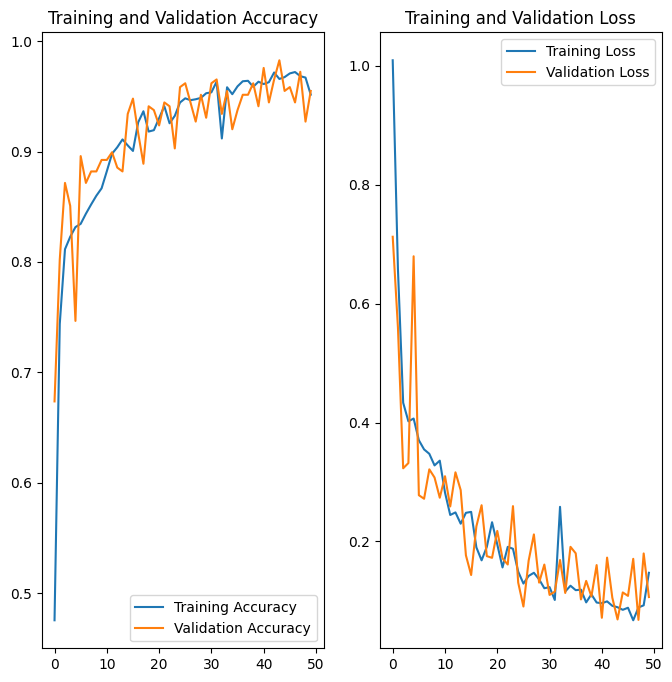

In [81]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHES), acc, label='Training Accuracy')
plt.plot(range(EPOCHES), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHES), loss, label='Training Loss')
plt.plot(range(EPOCHES), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Tomato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
predicted label: Tomato___healthy


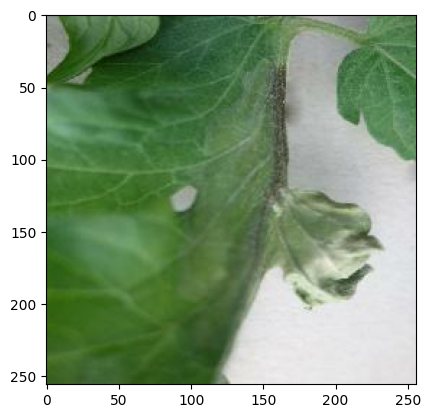

In [82]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [83]:

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


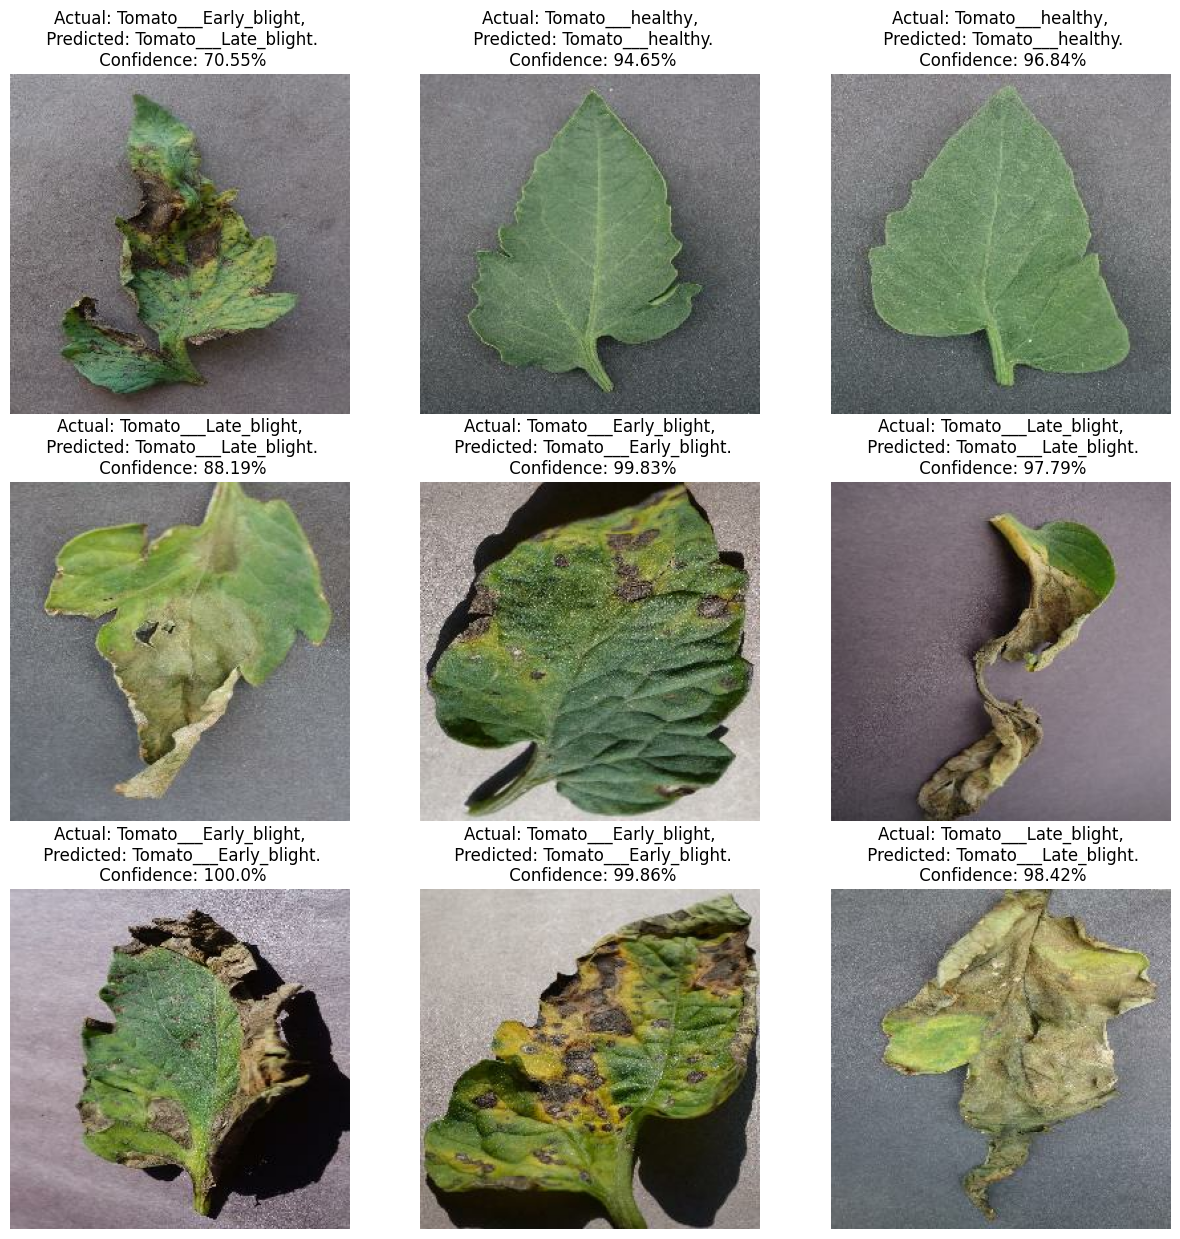

In [84]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [1]:
model.save('my_model.h5')  # Save to "my_model.h5"


NameError: name 'model' is not defined